# Code to generate Figures 2, 3, 4, and 5.

## Set up

Every time you load Yeast_chem_model.py (next command) the numpy random number seed is reset to the same state.

In [1]:
run ./Yeast_chem_model.py

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Figure 2

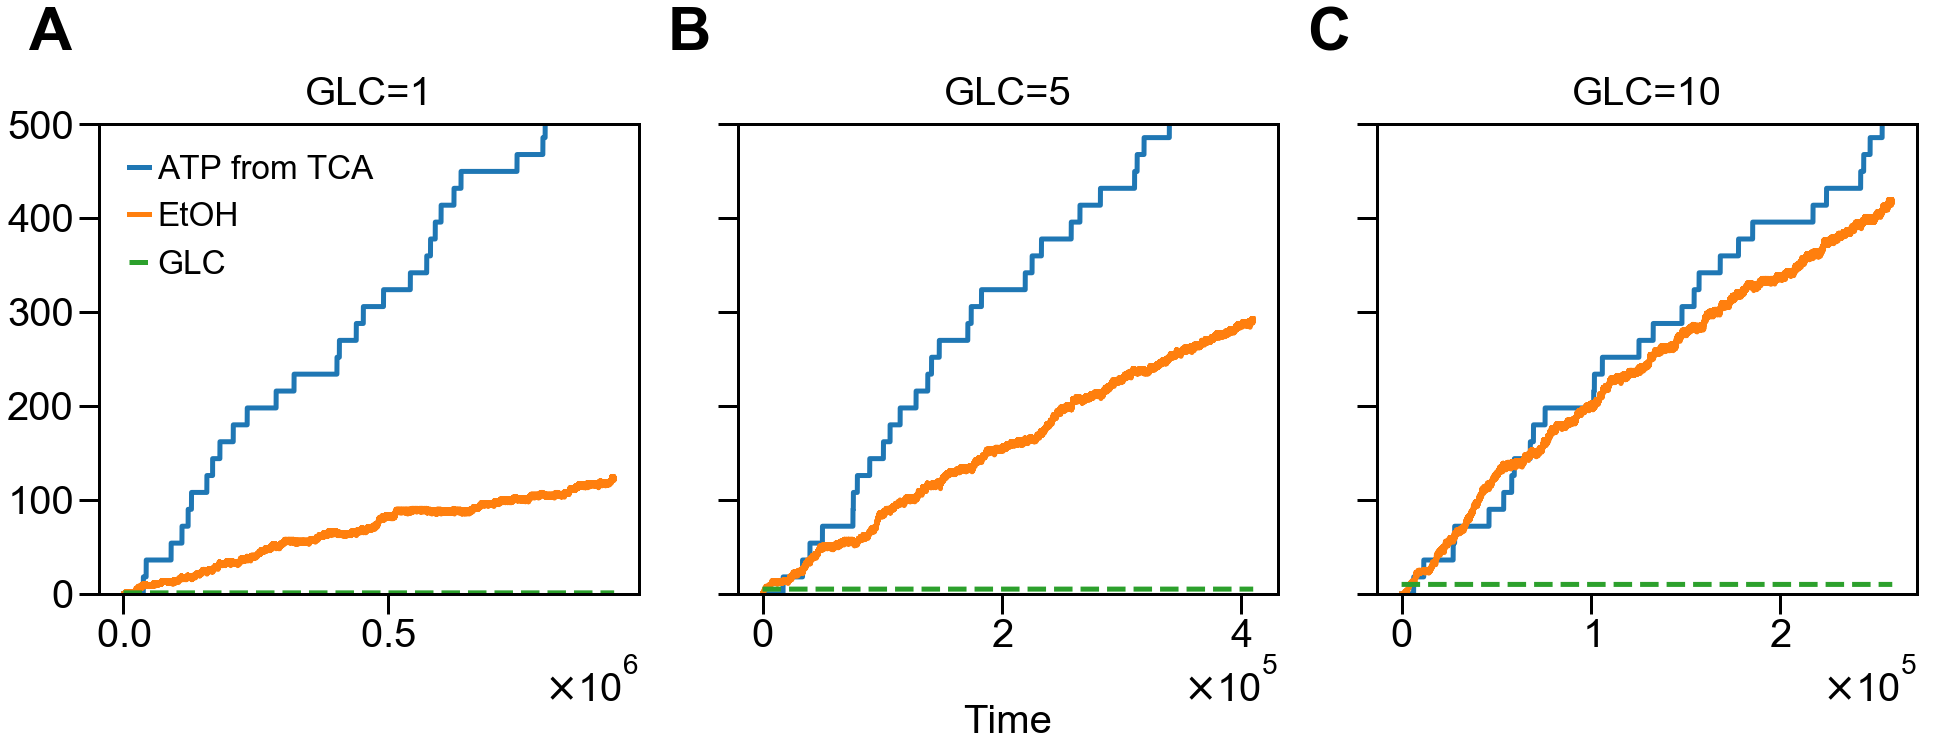

In [8]:
fig, ax = plt.subplots(nrows=1 ,ncols=3, figsize=(28, 10),)
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})

for j, par in zip([0,1,2], [1, 5, 10]):
    ax[j].tick_params(axis='x', which='both', bottom=True, top=False,
        labelbottom=True, size=20, width=3, direction='out', pad=5, colors='black')
    ax[j].tick_params(axis='y', which='both', left=True, right=False,
        labelbottom=False, size=20, width=3, direction='out', pad=5, colors='black')
    ax[j].spines['right'].set_visible(True)
    ax[j].spines['top'].set_visible(True)
    ax[j].spines['bottom'].set_visible(True)
    ax[j].spines['left'].set_visible(True)
    ax[j].spines['left'].set_linewidth(3)
    ax[j].spines['bottom'].set_linewidth(3)
    ax[j].spines['right'].set_linewidth(3)
    ax[j].spines['top'].set_linewidth(3)
    ax[j].spines['bottom'].set_color('black')
    ax[j].spines['left'].set_color('black')
    ax[j].set_ylim(0, 500)
    ax[j].axes.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
    ax[j].xaxis.major.formatter._useMathText = True
    #ax[j].set_yticks(np.arange(0, 610, 50))
    if j > 0:
        ax[j].set_yticklabels([" ", " ", " "])
    glc = par
    sim = Yeast(GLC=glc, PEP=0, PYR=0 , ETHANOL=0, NAD=100, NADH=0, PYK1_in=100, \
                 PYK1_ac=1, PYK2_in=100, PYK2_ac=1, k_lst=[1e-6, 2., 1e-2, 1e-5, 1e-4, 0. , 0., 0., 0., 0., 0.], regulation=True)
    sim.simulate(int(1e5))
    ax[j].errorbar(sim.time, sim.ATP_r_t, lw=5, label=r'ATP from TCA')
    ax[j].errorbar(sim.time, sim.ETHANOL_t, lw=5, label=r'EtOH')
    ax[j].errorbar(sim.time, sim.GLC_t, linestyle='dashed', lw=5, label=r'GLC')
    ax[j].set_title(r'GLC='+str(sim.GLC.n), fontsize= 40, pad=20)

legend = ax[0].legend(loc='best', shadow=False, fontsize='small',framealpha=0., handlelength=0.6, handletextpad=0.25)

for i, label in enumerate(('A', 'B', 'C')):
    ax[i].text(-.05, 1.25, label,fontsize=60, weight='bold', transform=ax[i].transAxes, va='top', ha='right')

plt.tight_layout()


ax[1].set_xlabel(r'Time', fontsize= 40, labelpad=50)

plt.savefig('./Fig2.png', bbox_inches='tight', dpi=300)

## Figure 3

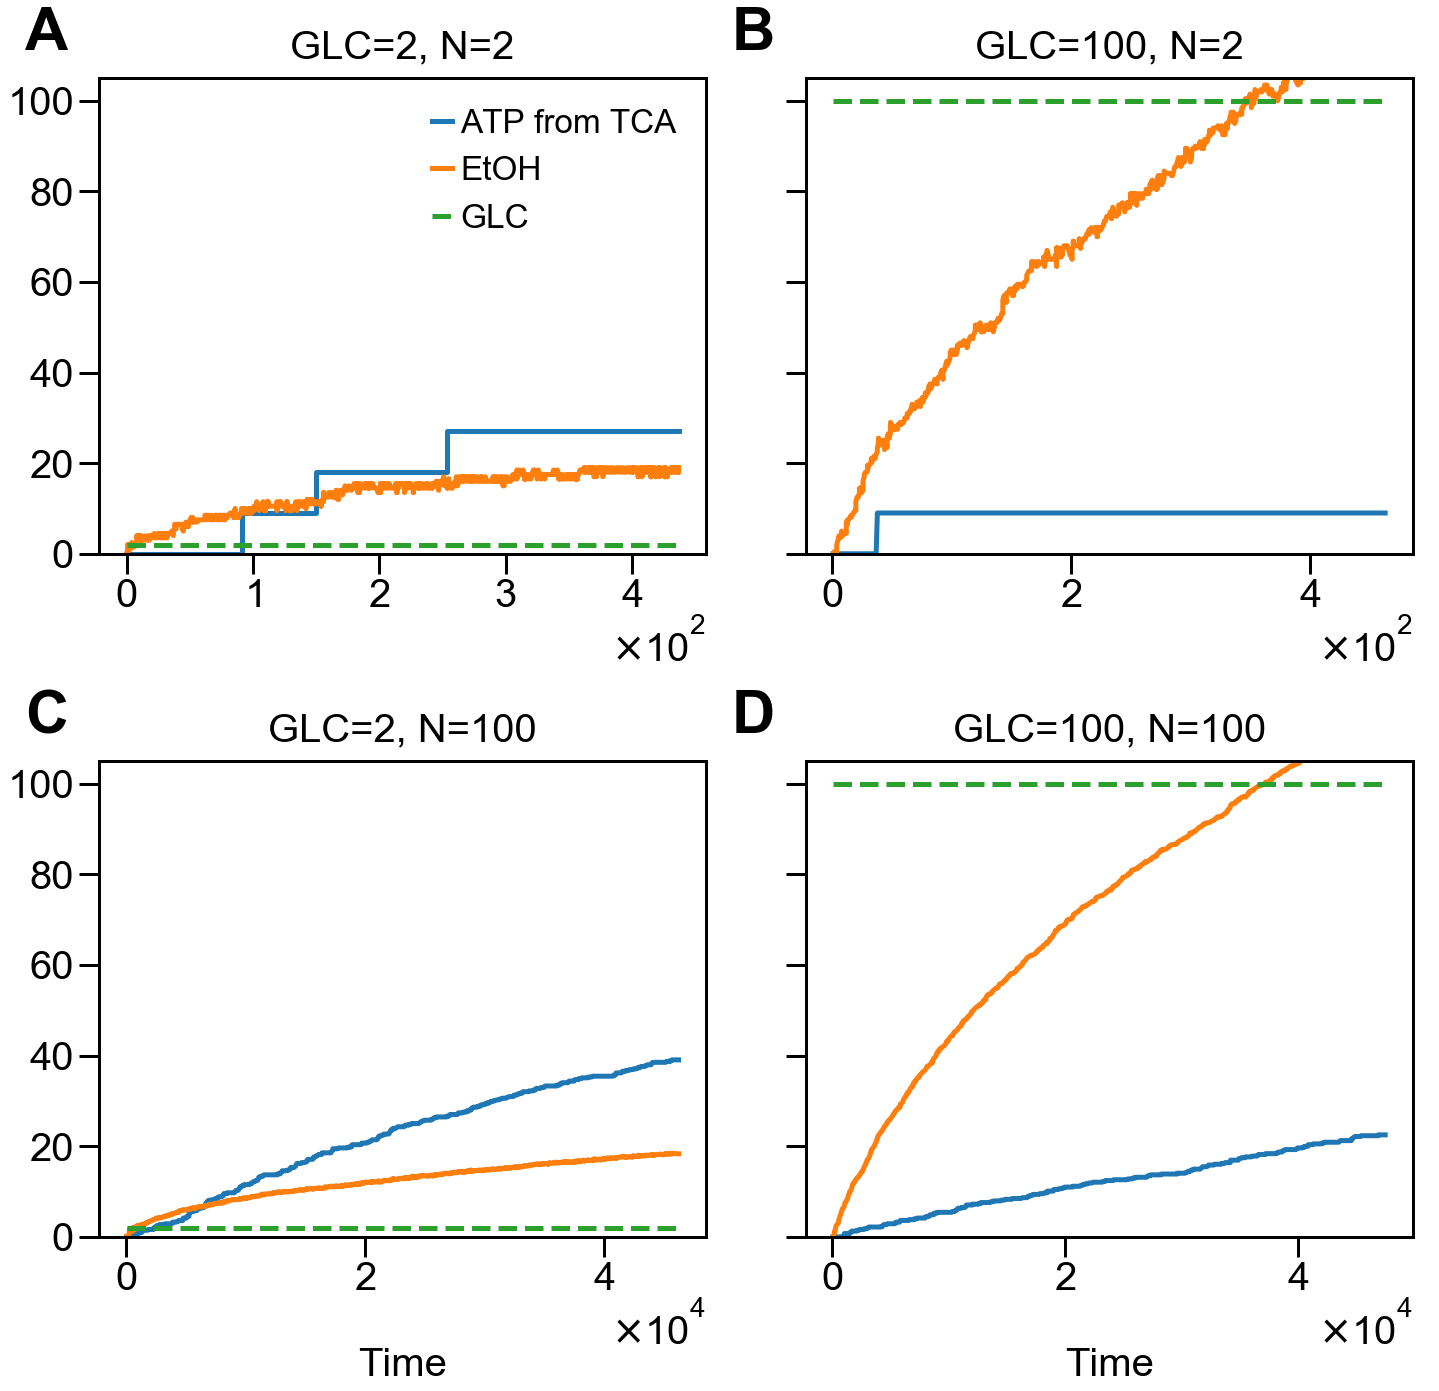

In [6]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(21, 20))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})

for j, par, label in zip([(0,0),(0,1),(1,0),(1,1)], [(2, 2),(100, 2),(2, 100),(100, 100)], ('A', 'B', 'C', 'D')):
    ax[j[0]][j[1]].tick_params(axis='x', which='both', bottom=True, top=False,
        labelbottom=True, size=20, width=3, direction='out', pad=5, colors='black')
    ax[j[0]][j[1]].tick_params(axis='y', which='both', left=True, right=False,
        labelbottom=False, size=20, width=3, direction='out', pad=5, colors='black')
    ax[j[0]][j[1]].spines['right'].set_visible(True)
    ax[j[0]][j[1]].spines['top'].set_visible(True)
    ax[j[0]][j[1]].spines['bottom'].set_visible(True)
    ax[j[0]][j[1]].spines['left'].set_visible(True)
    ax[j[0]][j[1]].spines['left'].set_linewidth(3)
    ax[j[0]][j[1]].spines['bottom'].set_linewidth(3)
    ax[j[0]][j[1]].spines['right'].set_linewidth(3)
    ax[j[0]][j[1]].spines['top'].set_linewidth(3)
    ax[j[0]][j[1]].spines['bottom'].set_color('black')
    ax[j[0]][j[1]].spines['left'].set_color('black')
    ax[j[0]][j[1]].axes.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
    ax[j[0]][j[1]].xaxis.major.formatter._useMathText = True
    ax[j[0]][j[1]].set_yticks(np.arange(0, 105, 20))
    ax[j[0]][j[1]].set_ylim(0,105)
    if j[1] != 0:
        ax[j[0]][j[1]].set_yticklabels([" ", " ", " "])
    if j[0] != 0: 
        ax[j[0]][j[1]].set_xlabel(r'Time', fontsize= 40, labelpad=50)
    glc = par[0]
    N = par[1]
    cell = Yeast(GLC=glc, PEP=0, PYR=0 , ETHANOL=0, NAD=100, NADH=0, PYK1_in=100, \
                     PYK1_ac=1, PYK2_in=100, PYK2_ac=1, k_lst=[1e-6, 2., 1e-2, 1e-5, 1e-4, 0. , 0., 0., 0., 0., 0.], regulation=True)
    pop = Population(cell, N)
    pop.simulate_pop(int(1e3), verbose=False)
    data = pop.stats
    ax[j[0]][j[1]].errorbar(pop.times, data['ATP_r'], lw=5, label=r'ATP from TCA')
    ax[j[0]][j[1]].errorbar(pop.times, data['EtOH'], lw=5, label=r'EtOH')
    ax[j[0]][j[1]].errorbar(pop.times, data['Glc'], linestyle='dashed', lw=5, label=r'GLC')
    ax[j[0]][j[1]].set_title(r'GLC='+str(glc)+ ', '+ 'N=' + str(N), fontsize= 40, pad=20)
    ax[j[0]][j[1]].text(-.05, 1.15, label,fontsize=60, weight='bold',  transform=ax[j[0]][j[1]].transAxes, va='top', ha='right')

legend = ax[0][0].legend(loc='best', shadow=False, fontsize='small',framealpha=0., handlelength=0.6, handletextpad=0.25)

plt.tight_layout()

plt.savefig('./Fig3.eps', bbox_inches='tight', dpi=300)

## Figure 4

The replicator equations were solved using matlab. The results and the code to solve the equations are included in the github repository.

In [6]:
rep_data = pd.read_csv('replicator_results.txt')

In [7]:
rep_data.head(5)

,t,r,f,g
0,0.000000,0.50000,0.50000,2.0000
1,0.001038,0.48755,0.51245,1.9979
2,0.002077,0.47544,0.52456,1.9958
3,0.003116,0.46368,0.53632,1.9936
4,0.004154,0.45227,0.54773,1.9914


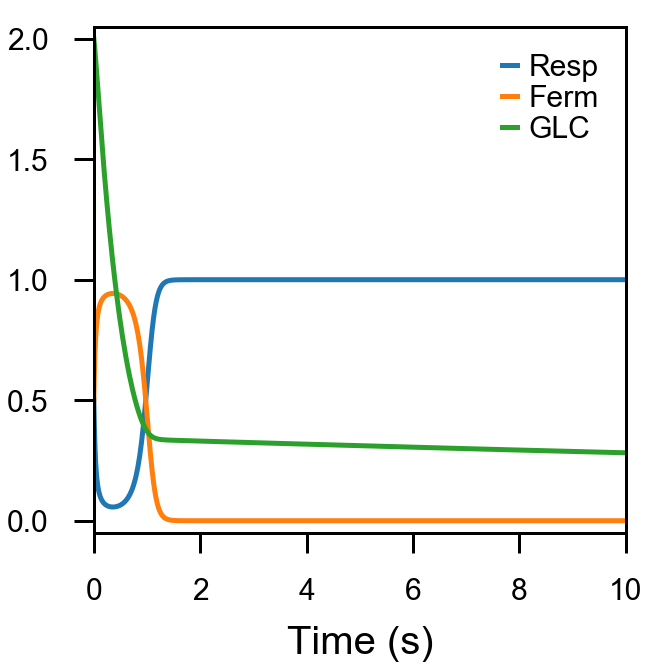

In [8]:
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 30})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.axes.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

end=430
ax.errorbar(rep_data.iloc[:, 0][:end], rep_data.iloc[:, 1][:end], lw=5, label='Resp')
ax.errorbar(rep_data.iloc[:, 0][:end], rep_data.iloc[:, 2][:end], lw=5, label='Ferm')
ax.errorbar(rep_data.iloc[:, 0][:end], rep_data.iloc[:, 3][:end], lw=5, label='GLC')
#ax.errorbar(pop.times, data_2_500['EtOH'], lw=5, label=r'EtOH')

#ax.set_title(r'GLC='+str(glc)+ ', '+ 'N=' + str(N), fontsize= 40, pad=25)

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0., labelspacing=0.1,\
          numpoints=1, markerscale=0.3, fancybox=False, edgecolor='white')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.xlabel(r'Time (s)', fontsize= 40, labelpad=20)
plt.tight_layout()

plt.ylim(-0.05, 2.05)
plt.xlim(0, 10)
plt.savefig('./Fig4.eps', bbox_inches='tight', dpi=300)

## Figure 5

### Pop and subpops with regulation

In [3]:
glc =1e3
sys = Yeast(GLC=glc, PEP=0, PYR=0 , ETHANOL=0, NAD=100, NADH=0, PYK1_in=100, \
                 PYK1_ac=1, PYK2_in=100, PYK2_ac=1, k_lst=[1e-6, 2., 1e-2, 1e-5, 1e-4, 0. , 0., 0., 0., 0., 0.], regulation=True)

N = 100
pop_switch = Population(sys, N, fixed_source=False)
pop_switch.simulate_pop(int(1e2), verbose=False)
EtOH_with_switch = [i.ETHANOL.n for i in pop_switch.pop]
R_with_switch = [i.ATP_r.n for i in pop_switch.pop]

In [4]:
data_switch = pop_switch.stats

In [14]:
x= np.random.choice(pop_switch.pop, size=10)
sub_pop_switch_1 = Population(sys, N, fixed_source=False)
sub_pop_switch_1.change_pop(x)
sub_pop_switch_1.simulate_pop(int(1e2), verbose=False)
sub_EtOH_with_switch_1 = [i.ETHANOL.n for i in sub_pop_switch_1.pop]
sub_data_switch_1 = sub_pop_switch_1.stats

x= np.random.choice(pop_switch.pop, size=10)
sub_pop_switch_2 = Population(sys, N, fixed_source=False)
sub_pop_switch_2.change_pop(x)
sub_pop_switch_2.simulate_pop(int(1e2), verbose=False)
sub_EtOH_with_switch_2 = [i.ETHANOL.n for i in sub_pop_switch_2.pop]
sub_data_switch_2 = sub_pop_switch_1.stats

x= np.random.choice(pop_switch.pop, size=10)
sub_pop_switch_3 = Population(sys, N, fixed_source=False)
sub_pop_switch_3.change_pop(x)
sub_pop_switch_3.simulate_pop(int(1e2), verbose=False)
sub_EtOH_with_switch_3 = [i.ETHANOL.n for i in sub_pop_switch_3.pop]
sub_data_switch_3 = sub_pop_switch_1.stats

### Pop and subpops without regulation

In [8]:
glc =1e3
sys = Yeast(GLC=glc, PEP=0, PYR=0 , ETHANOL=0, NAD=100, NADH=0, PYK1_in=100, \
                 PYK1_ac=0., PYK2_in=100, PYK2_ac=0., k_lst=[1e-6, 2., 1e-2, 1e-5, 1e-4, 1e-1 , 1e-5, 1e-3, 1e-5, 0, 0], regulation=False)
sys.set_strat_prop(50)

N = 100
pop = Population(sys, N, fixed_source=False)
pop.simulate_pop(int(1e3), verbose=False)
EtOH_without_switch = [i.ETHANOL.n for i in pop.pop]
R_without_switch = [i.ATP_r.n for i in pop.pop]

In [9]:
data_without_switch = pop.stats

In [11]:
x= np.random.choice(pop.pop, size=10)
sub_pop_no_switch_1 = Population(sys, N, fixed_source=False)
sub_pop_no_switch_1.change_pop(x)
sub_pop_no_switch_1.simulate_pop(int(2e3), verbose=False)
sub_EtOH_no_switch_1 = [i.ETHANOL.n for i in sub_pop_no_switch_1.pop]
sub_data_no_switch_1 = sub_pop_no_switch_1.stats

x= np.random.choice(pop.pop, size=10)
sub_pop_no_switch_2 = Population(sys, N, fixed_source=False)
sub_pop_no_switch_2.change_pop(x)
sub_pop_no_switch_2.simulate_pop(int(2e3), verbose=False)
sub_EtOH_no_switch_2 = [i.ETHANOL.n for i in sub_pop_no_switch_2.pop]
sub_data_no_switch_2 = sub_pop_no_switch_2.stats

x= np.random.choice(pop.pop, size=10)
sub_pop_no_switch_3 = Population(sys, N, fixed_source=False)
sub_pop_no_switch_3.change_pop(x)
sub_pop_no_switch_3.simulate_pop(int(2e3), verbose=False)
sub_EtOH_no_switch_3 = [i.ETHANOL.n for i in sub_pop_no_switch_3.pop]
sub_data_no_switch_3 = sub_pop_no_switch_3.stats

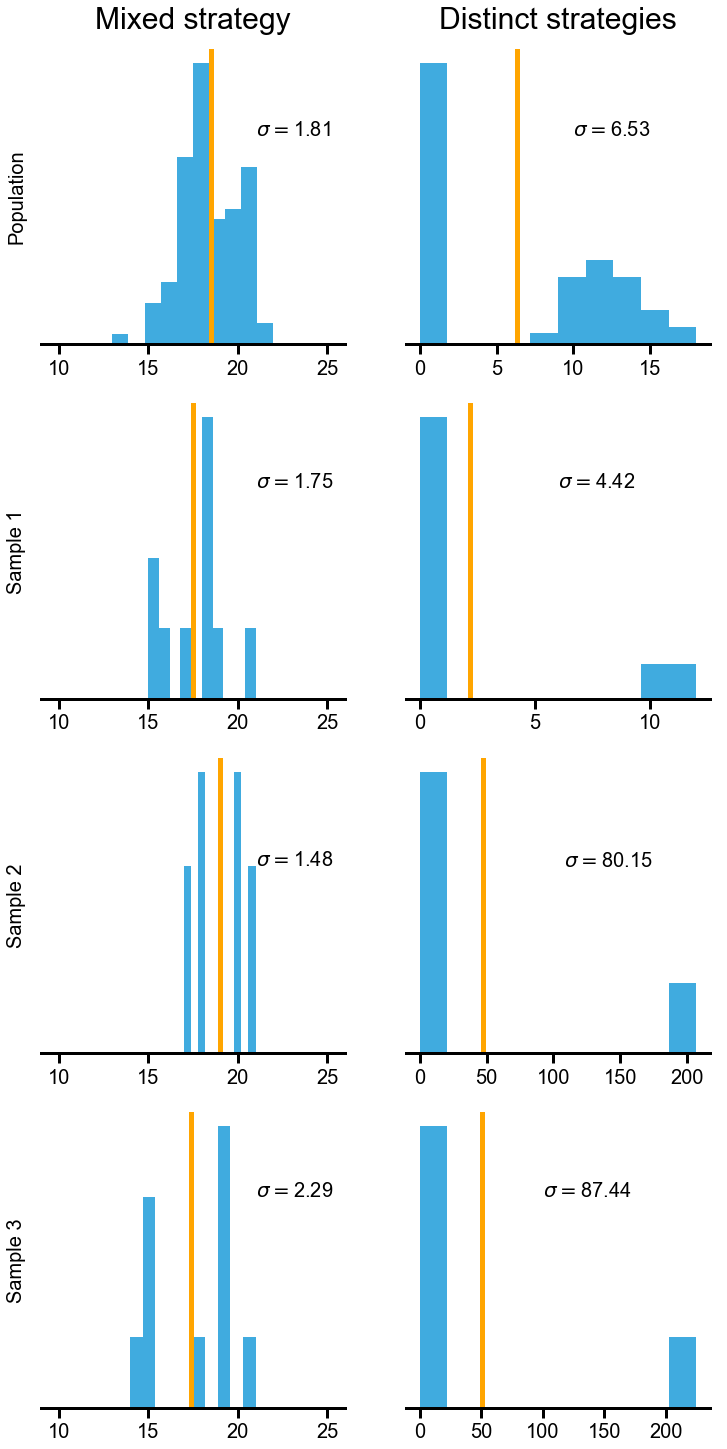

In [70]:
fig, ax = plt.subplots(nrows=4 ,ncols=2, figsize=(12, 25))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 20})

for i in [0,1,2,3]:
    for j in [0,1]:
        ax[i][j].tick_params(axis='x', which='both', bottom=True, top=False,
                             labelbottom=True, size=10, width=3, direction='out', pad=5, colors='black')
        ax[i][j].tick_params(axis='y', which='both', left=False, right=False,
                             labelbottom=False, size=0, width=0, direction='out', pad=5, colors='black')
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['bottom'].set_visible(True)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].spines['left'].set_linewidth(3)
        ax[i][j].spines['bottom'].set_linewidth(3)
        ax[i][j].spines['right'].set_linewidth(3)
        ax[i][j].spines['top'].set_linewidth(3)
        ax[i][j].spines['bottom'].set_color('black')
        ax[i][j].spines['left'].set_color('black')
        ax[i][j].set_yticklabels([" ", " ", " "])
        if j == 0:
            ax[i][j].set_xlim(9, 26)
            ax[i][j].set_xticks([10, 15, 20, 25])
            
font_size = 20
        
ax[0][0].hist(EtOH_with_switch, bins=10, color='#40ABDF')
ax[0][0].axvline(x=np.mean(EtOH_with_switch), lw=5, color='orange')
ax[0][0].text(21,20, r'$\sigma=$' + str(np.round(np.std(EtOH_with_switch), decimals=2)))

ax[0][0].set_title(r"Mixed strategy", fontsize= 30, pad=20)

ax[1][0].hist(sub_EtOH_with_switch_1, bins=10, color='#40ABDF')
ax[1][0].axvline(x=np.mean(sub_EtOH_with_switch_1), lw=5, color='orange')
ax[1][0].text(21,3, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_with_switch_1), decimals=2)))


ax[2][0].hist(sub_EtOH_with_switch_2, bins=10, color='#40ABDF')
ax[2][0].axvline(x=np.mean(sub_EtOH_with_switch_2), lw=5, color='orange')
ax[2][0].text(21,2, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_with_switch_2), decimals=2)))


ax[3][0].hist(sub_EtOH_with_switch_3, bins=10, color='#40ABDF')
ax[3][0].axvline(x=np.mean(sub_EtOH_with_switch_3), lw=5, color='orange')
ax[3][0].text(21,3, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_with_switch_3), decimals=2)))


ax[0][1].hist(EtOH_without_switch, bins=10, color='#40ABDF')
ax[0][1].axvline(x=np.mean(EtOH_without_switch), lw=5, color='orange')
ax[0][1].set_title("Distinct strategies", fontsize= 30, pad=20)

ax[0][1].text(10,37, r'$\sigma=$' + str(np.round(np.std(EtOH_without_switch), decimals=2)))

ax[1][1].hist(sub_EtOH_no_switch_1, bins=10, color='#40ABDF')
ax[1][1].axvline(x=np.mean(sub_EtOH_no_switch_1), lw=5, color='orange')
ax[1][1].text(6,6, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_no_switch_1), decimals=2)))

ax[2][1].hist(sub_EtOH_no_switch_2, bins=10, color='#40ABDF')
ax[2][1].axvline(x=np.mean(sub_EtOH_no_switch_2), lw=5, color='orange')
ax[2][1].text(108,5.3, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_no_switch_2), decimals=2)))


ax[3][1].hist(sub_EtOH_no_switch_3, bins=10, color='#40ABDF')
ax[3][1].axvline(x=np.mean(sub_EtOH_no_switch_3), lw=5, color='orange')
ax[3][1].text(100,6, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_no_switch_3), decimals=2)))



ax[0][0].set_ylabel(r"Population", fontsize= font_size)#, pad=20)
ax[1][0].set_ylabel(r"Sample 1", fontsize= font_size)#, pad=20)
ax[2][0].set_ylabel(r"Sample 2", fontsize= font_size)#, pad=20)
ax[3][0].set_ylabel(r"Sample 3", fontsize= font_size)#, pad=20)


plt.subplots_adjust(hspace=0.2)            


#plt.show()
plt.savefig('../paper_figs/Fig5.eps', bbox_inches='tight', dpi=300)